# Almog PIV project

Post analysis, see also the analysis*.ipynb

February 15


In [1]:
from pivpy import pivpy, io, graphics
import xarray as xr
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

plt.rcParams["figure.figsize"] = (10, 10)

/root/venv/lib/python3.9/site-packages/pivpy/io.py:19: UserWarning: lvreader is not installed
  warnings.warn("lvreader is not installed")


In [2]:
## Initialize data location

In [3]:
import pathlib
root_path = pathlib.Path('./')
analysis_path = root_path / 'Analysis'
image_path = root_path / 'RawData'


run_no = 1
first_file = 100
num_files = 100
d = 19.5 # mm 
U_theo = 26.84 # mm/s


# list_files = sorted(analysis_path.rglob('feb15-000*.vec'))
netcdf_file = f'feb15_run{run_no}.nc'


## Figures

Almog prepared a document on overleaf about the PIV analysis. the link is here
https://www.overleaf.com/project/63f5eeb8f7fb1a583f248b22


1. we normalize everything to the cylinder_scale $d$ and $U_\infty$
2. We plot $V_x(y)$ to see that it is close to 1 and perpendicular to see that the flow is not affected by the walls



In [4]:
# non dimensionalization
# ds is scaled above, but not completely, to comply with images

ds = xr.load_dataset(netcdf_file)

In [5]:

# Run 2 is scaled already by Insight. Careful !!!!

# we measured 
mm_scale = 230 # mm
pix_scale = 3204 # pix, see above
dt = 10000e-6 # 10,000 microseconds = 10 msec = 0.01 sec


# ds = ds.piv.set_scale(mm_scale/pix_scale)
# ds = ds.piv.set_delta_t(dt)
ds['u'] = ds['u']*mm_scale/pix_scale
ds['v'] = ds['v']*mm_scale/pix_scale
ds['u'] = ds.u / dt
ds['v'] = ds.v / dt

ds['x'] = ds['x']*mm_scale/pix_scale / d # in mm, so it's now dimensionless
ds['y'] = ds['y']*mm_scale/pix_scale / d 



ds['x'] = ds['x'].max() - ds['x']

middle = ds['y'].max()/2
ds['y'] = ds['y'] - middle

ds['u'] = -1*ds['u']


ds['u'] = ds['u'] / U_theo
ds['v'] = ds['v'] / U_theo


# Ensemble average map:
ave = ds.piv.average

(<Figure size 1000x1000 with 2 Axes>,
 <AxesSubplot: xlabel='x ()', ylabel='y ()'>)

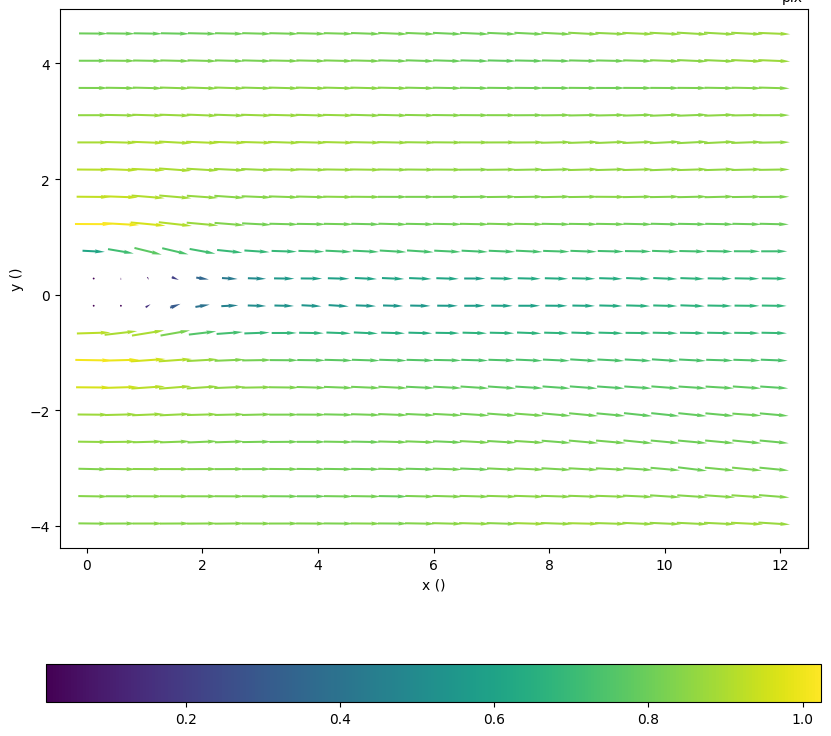

In [6]:

fig = plt.figure()
ave['x'].attrs['units'] = ''
ave['y'].attrs['units'] = ''
ave.piv.quiver(arrScale = 20,colorbar=True, colorbar_orient='horizontal', nthArr = 4, cmap='viridis')
# fig.savefig(f'../results/feb15-run{run_no}_piv_map.png')

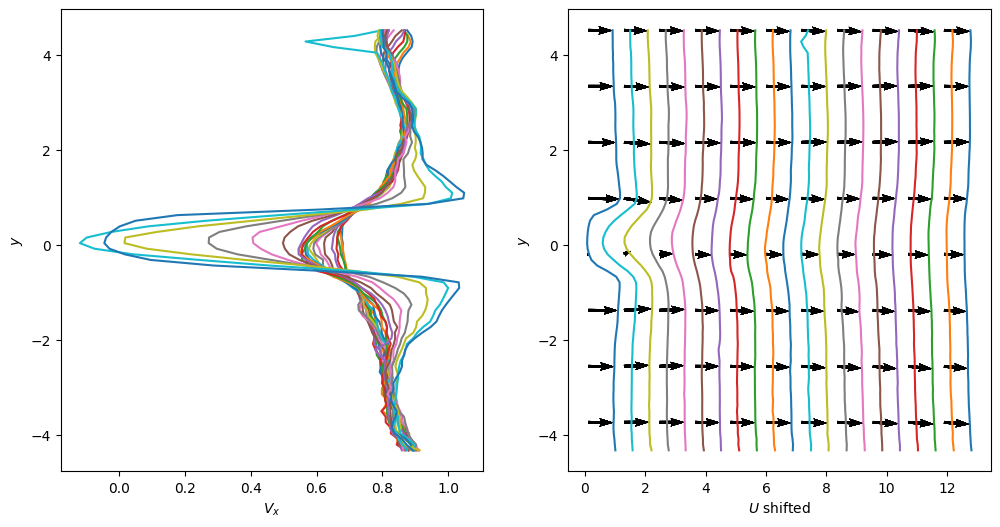

In [7]:
fig,ax = plt.subplots(1,2,figsize=(12,6))

for x in ave.x[::5]:
    tmp = ave.sel(x=x, method='nearest')
    ax[0].plot(tmp.u, tmp.y)
    ax[0].set_xlabel('$V_x$')
    ax[0].set_ylabel('$y$')
    
    ax[1].quiver(ave['x'][::10],ave['y'][::10],ave['u'][::10,::10].T,ave['v'][::10,::10].T)
    ax[1].plot(tmp.u + x, tmp.y)
    ax[1].set_xlabel('$U$ shifted')
    ax[1].set_ylabel('$y$')


# fig.savefig(f'../results/feb15-run{run_no}_profiles_Utheo.png')

In [8]:
# output_file = f'../data/feb15_run{run_no}_ave.nc'
# ave.to_netcdf(output_file)

<a style='text-decoration:none;line-height:16px;display:flex;color:#5B5B62;padding:10px;justify-content:end;' href='https://deepnote.com?utm_source=created-in-deepnote-cell&projectId=fa451f97-b723-4eac-83b8-4769d80360e5' target="_blank">
 </img>
Created in <span style='font-weight:600;margin-left:4px;'>Deepnote</span></a>